In [1]:
import uproot 
import numpy as np
import matplotlib.pyplot as plt
import statistics as stat
from iminuit import Minuit
import matplotlib.cm as cm
from scipy.optimize import curve_fit
import bened as ben

c:\Users\Utente\Desktop\uni\MAGISTRALE\ESAMI\laboratory1\lab\gammagit\bened.py:248: SyntaxWarning: invalid escape sequence '\c'
  print(f'Chi-squared $\chi^2$ = {chi_squared}')
c:\Users\Utente\Desktop\uni\MAGISTRALE\ESAMI\laboratory1\lab\gammagit\bened.py:249: SyntaxWarning: invalid escape sequence '\c'
  print(f'Reduced chi-squared $\chi^2_r$ = {chi_squared_reduced}')
c:\Users\Utente\Desktop\uni\MAGISTRALE\ESAMI\laboratory1\lab\gammagit\bened.py:342: SyntaxWarning: invalid escape sequence '\c'
  print(f'Chi-squared $\chi^2$ = {chi_squared}')
c:\Users\Utente\Desktop\uni\MAGISTRALE\ESAMI\laboratory1\lab\gammagit\bened.py:343: SyntaxWarning: invalid escape sequence '\c'
  print(f'Reduced chi-squared $\chi^2_r$ = {chi_squared_reduced}')


# GAMMA XDVR

## CARICAMENTO DATI DA FILE E DIVISIONE CANALI

In [2]:
#giorno2
americio = uproot.open('group23\\10min-americio-gr23\\RAW\\DataR_10min-americio-gr23.root')
sodio = uproot.open('group23\\10min-sodio-gr23-SOGLIA\\RAW\\DataR_10min-sodio-gr23-SOGLIA.root')
europio = uproot.open('group23\\20min-europio-gr23\\RAW\\DataR_20min-europio-gr23.root')
back2 = uproot.open('group23\\30min-background-gr23\\RAW\\DataR_30min-background-gr23.root')
#giorno3
autunite = uproot.open('group23\\15min-autunite-gr23\\RAW\\DataR_15min-autunite-gr23.root')
enea = uproot.open('group23\\15min-Enea-water-gr23\\RAW\\DataR_15min-Enea-water-gr23.root')
porcini = uproot.open('group23\\15min-porcini-mushrooms-gr23\\RAW\\DataR_15min-porcini-mushrooms-gr23.root')
cement = uproot.open('group23\\15min-portland-cement-gr23\\RAW\\DataR_15min-portland-cement-gr23.root')
potassio = uproot.open('group23\\15min-potassio-gr23\\RAW\\DataR_15min-potassio-gr23.root')
zirconio = uproot.open('group23\\15min-zirconium-oxide-gr23\\RAW\\DataR_15min-zirconium-oxide-gr23.root')
back3 = uproot.open('group23\\15min-background-gr23-giorno3\\RAW\\DataR_15min-background-gr23.root')
#radon
exposed = uproot.open('group23\\30min-exposed-radon-gr23\\RAW\\DataR_30min-exposed-radon-gr23.root')
unexposed =uproot.open('group23\\30min-non-exposed-radon-gr23\\RAW\\DataR_30min-non-exposed-radon-gr23.root')
calibrated = uproot.open('group23\\30min-calibrated-radon-gr23\\RAW\\DataR_30min-calibrated-radon-gr23.root')

In [3]:
energy_americio = np.array(americio['Data_R;3']['Energy'].array())
canaliAM = np.array(americio['Data_R;3']['Channel'].array())

energy_sodio = np.array(sodio['Data_R;6']['Energy'].array())
canaliNA = np.array(sodio['Data_R;6']['Channel'].array())

energy_europio = np.array(europio['Data_R;6']['Energy'].array())
canaliEU = np.array(europio['Data_R;6']['Channel'].array())

energy_autunite = np.array(autunite['Data_R;4']['Energy'].array())
canaliAUT = np.array(autunite['Data_R;4']['Channel'].array())

energy_enea = np.array(enea['Data_R;4']['Energy'].array())
canaliENEA = np.array(enea['Data_R;4']['Channel'].array())

energy_porcini = np.array(porcini['Data_R;4']['Energy'].array())
canaliPORCINI = np.array(porcini['Data_R;4']['Channel'].array())

energy_cement = np.array(cement['Data_R;5']['Energy'].array())
canaliCEMENTO = np.array(cement['Data_R;5']['Channel'].array())

energy_potassio = np.array(potassio['Data_R;4']['Energy'].array())
canaliPOTASSIO = np.array(potassio['Data_R;4']['Channel'].array())

energy_zirconio = np.array(zirconio['Data_R;5']['Energy'].array())
canaliZIRCONIO = np.array(zirconio['Data_R;5']['Channel'].array())

fondo2giorno = np.array(back2['Data_R;4']['Energy'].array())
canaliback2 = np.array(back2['Data_R;4']['Channel'].array())

fondo3giorno = np.array(back3['Data_R;5']['Energy'].array())
canaliback3 = np.array(back3['Data_R;5']['Channel'].array())

energy_exposed = np.array(exposed['Data_R;9']['Energy'].array())
canaliexp = np.array(exposed['Data_R;9']['Channel'].array())

energy_unexposed = np.array(unexposed['Data_R;9']['Energy'].array())
canaliunexp = np.array(unexposed['Data_R;9']['Channel'].array())

energy_calibrated = np.array(calibrated['Data_R;9']['Energy'].array())
canalical = np.array(calibrated['Data_R;9']['Channel'].array())

C:\Users\Utente\AppData\Local\Temp\ipykernel_16476\756315752.py:1: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  energy_americio = np.array(americio['Data_R;3']['Energy'].array())
C:\Users\Utente\AppData\Local\Temp\ipykernel_16476\756315752.py:2: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  canaliAM = np.array(americio['Data_R;3']['Channel'].array())
C:\Users\Utente\AppData\Local\Temp\ipykernel_16476\756315752.py:4: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  energy_sodio = np.array(sodio['Data_R;6']['Energy'].array())
C:\Users\Utente\AppData\Local\Temp\ipykernel_16476\756315752.py:5: DeprecationWarning: __array__ 

In [4]:
# #CH0 è IODURO DI SODIO e CH1 è HPGE
# americio_data = np.array([energy_americio[canaliAM == 0], energy_americio[canaliAM == 1]])
# sodio_data = np.array([energy_sodio[canaliNA == 0], energy_sodio[canaliNA == 1]])
# europio_data = np.array([energy_europio[canaliEU == 0], energy_europio[canaliEU == 1]])

# autunite_data = np.array([energy_autunite[canaliAUT == 0], energy_autunite[canaliAUT == 1]])
# enea_data = np.array([energy_enea[canaliENEA == 0], energy_enea[canaliENEA == 1]])
# porcini_data = np.array([energy_porcini[canaliPORCINI == 0], energy_porcini[canaliPORCINI == 1]])
# cemento_data = np.array([energy_cement[canaliCEMENTO == 0], energy_cement[canaliCEMENTO == 1]])
# potassio_data = np.array([energy_potassio[canaliPOTASSIO == 0], energy_potassio[canaliPOTASSIO == 1]])
# zirconio_data = np.array([energy_zirconio[canaliZIRCONIO == 0], energy_zirconio[canaliZIRCONIO == 1]])

# fondo2_data = np.array([fondo2giorno[canaliback2 == 0], fondo2giorno[canaliback2 == 1]])
# fondo3_data = np.array([fondo3giorno[canaliback3 == 0], fondo3giorno[canaliback3 == 1]])

# exposed_data = np.array([energy_exposed[canaliexp == 0], energy_exposed[canaliexp == 1]])
# unexposed_data = np.array([energy_unexposed[canaliunexp == 0], energy_unexposed[canaliunexp == 1]])
# calibrated_data = np.array([energy_calibrated[canalical == 0], energy_calibrated[canalical == 1]])

In [5]:
# Separa i dati in due array distinti per ogni canale (0 e 1)
americio_ch0 = energy_americio[canaliAM == 0]
americio_ch1 = energy_americio[canaliAM == 1]

sodio_ch0 = energy_sodio[canaliNA == 0]
sodio_ch1 = energy_sodio[canaliNA == 1]

europio_ch0 = energy_europio[canaliEU == 0]
europio_ch1 = energy_europio[canaliEU == 1]

autunite_ch0 = energy_autunite[canaliAUT == 0]
autunite_ch1 = energy_autunite[canaliAUT == 1]

enea_ch0 = energy_enea[canaliENEA == 0]
enea_ch1 = energy_enea[canaliENEA == 1]

porcini_ch0 = energy_porcini[canaliPORCINI == 0]
porcini_ch1 = energy_porcini[canaliPORCINI == 1]

cemento_ch0 = energy_cement[canaliCEMENTO == 0]
cemento_ch1 = energy_cement[canaliCEMENTO == 1]

potassio_ch0 = energy_potassio[canaliPOTASSIO == 0]
potassio_ch1 = energy_potassio[canaliPOTASSIO == 1]

zirconio_ch0 = energy_zirconio[canaliZIRCONIO == 0]
zirconio_ch1 = energy_zirconio[canaliZIRCONIO == 1]

fondo2_ch0 = fondo2giorno[canaliback2 == 0]
fondo2_ch1 = fondo2giorno[canaliback2 == 1]

fondo3_ch0 = fondo3giorno[canaliback3 == 0]
fondo3_ch1 = fondo3giorno[canaliback3 == 1]

exposed_ch0 = energy_exposed[canaliexp == 0]
exposed_ch1 = energy_exposed[canaliexp == 1]

unexposed_ch0 = energy_unexposed[canaliunexp == 0]
unexposed_ch1 = energy_unexposed[canaliunexp == 1]

calibrated_ch0 = energy_calibrated[canalical == 0]
calibrated_ch1 = energy_calibrated[canalical == 1]

## ENERGY CALIBRATION

In [6]:
# sodio1_1peak = ben.normal(sodio_ch1, 'ADC', 'counts', 'First peak of $^{22}$Na - uncalibrated', 2840, 2900, sodio_ch1.max(), n=2)

## efficienza HPGe

In [7]:
europio20min = uproot.open('group23\\20min-europio-gr23\\RAW\\DataR_20min-europio-gr23.root')
energy_europio20min =np.array(europio20min['Data_R;6']['Energy'].array())

C:\Users\Utente\AppData\Local\Temp\ipykernel_16476\3061995950.py:2: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  energy_europio20min =np.array(europio20min['Data_R;6']['Energy'].array())


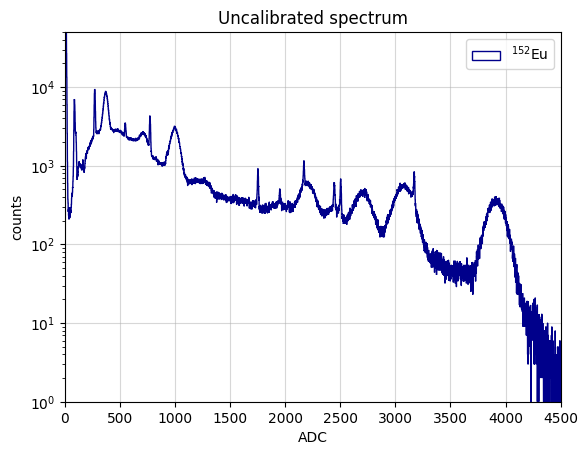

In [8]:
plt.hist(energy_europio20min, bins=energy_europio20min.max(), edgecolor='darkblue', histtype='step', lw=1, label="$^{152}$Eu")
plt.title('Uncalibrated spectrum')
plt.legend(loc='upper right')
plt.xlabel("ADC")
plt.ylabel("counts")
plt.xlim(0, 4500)
plt.ylim(1, 50000)
plt.yscale("log")
plt.grid(True, alpha=0.5)
plt.show()